In [431]:
###Import all libraries needed

In [432]:
from typing import List, Dict, Tuple, Callable, Union
import os
import gc
import traceback
import warnings
from pdb import set_trace

import sklearn
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [433]:
###Load Data | Visualizations | Preprocessing

In [434]:
df = pd.read_csv('accident.csv')

In [435]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [436]:
len(df)

7728394

In [437]:
df_clean = df.dropna()

In [438]:
len(df_clean)

3554549

In [439]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [440]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')

In [441]:
df['Hour'] = df['Start_Time'].dt.hour
df['Day'] = df['Start_Time'].dt.dayofweek 
df['Month'] = df['Start_Time'].dt.month
df['Year'] = df['Start_Time'].dt.year
df['Duration'] = (df['End_Time'] - df['Start_Time']).dt.total_seconds() / 60  # in minutes

In [442]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 51 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 object        
 2   Severity               int64         
 3   Start_Time             datetime64[ns]
 4   End_Time               datetime64[ns]
 5   Start_Lat              float64       
 6   Start_Lng              float64       
 7   End_Lat                float64       
 8   End_Lng                float64       
 9   Distance(mi)           float64       
 10  Description            object        
 11  Street                 object        
 12  City                   object        
 13  County                 object        
 14  State                  object        
 15  Zipcode                object        
 16  Country                object        
 17  Timezone               object        
 18  Airport_Code          

In [443]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Hour,Day,Month,Year,Duration
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,Night,Night,Night,Night,5.0,0.0,2.0,2016.0,314.0
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,Night,Night,Night,Day,6.0,0.0,2.0,2016.0,30.0
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,Night,Night,Day,Day,6.0,0.0,2.0,2016.0,30.0
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,Night,Day,Day,Day,7.0,0.0,2.0,2016.0,30.0
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,Day,Day,Day,Day,7.0,0.0,2.0,2016.0,30.0


In [444]:
df_2022 = df[df['Year'] == 2022]

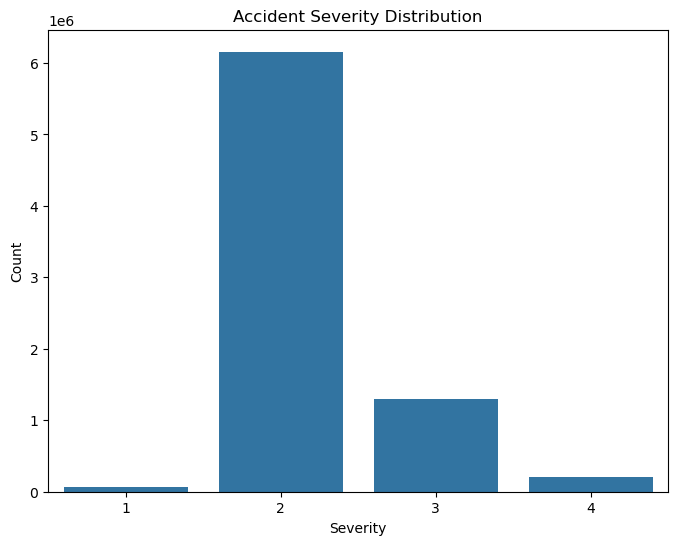

In [445]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Severity', data=df)
plt.title('Accident Severity Distribution')
plt.xlabel('Severity')
plt.ylabel('Count')
plt.show()

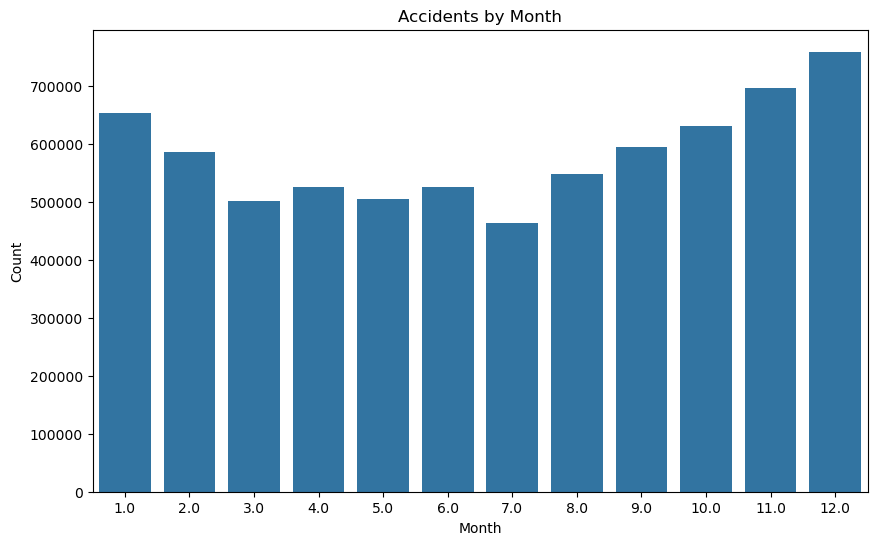

In [446]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data=df)
plt.title('Accidents by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

In [447]:
# Define a mapping for standardizing weather conditions
weather_mapping = {
    'Fair': 'Fair',
    'Mostly Cloudy': 'Cloudy',
    'Partly Cloudy': 'Cloudy',
    'Cloudy': 'Cloudy',
    'Fog': 'Fog',
    'Haze': 'Fog',
    'Shallow Fog': 'Fog',
    'Patches of Fog': 'Fog',
    'Light Rain': 'Rain',
    'Thunder in the Vicinity': 'Thunder',
    'Rain': 'Rain',
    'Heavy Rain': 'Rain',
    'Heavy Rain / Windy': 'Rain',
    'Fair / Windy': 'Fair',
    'Light Rain with Thunder': 'Rain',
    'Smoke': 'Smoke',
    'Thunder': 'Thunder',
    'Showers in the Vicinity': 'Rain',
    'T-Storm': 'Thunderstorm',
    'Thunder / Windy': 'Thunderstorm',
    'Heavy T-Storm / Windy': 'Thunderstorm',
    'Heavy T-Storm': 'Thunderstorm',
    'Drizzle': 'Rain',
    'Light Rain / Windy': 'Rain',
    'Mist': 'Fog',
    'Light Rain Shower': 'Rain',
    'Light Drizzle': 'Rain',
    'Drizzle and Fog': 'Rain/Fog',
    'T-Storm / Windy': 'Thunderstorm',
    'Rain / Windy': 'Rain',
    'Blowing Dust': 'Dust',
    'Heavy Drizzle': 'Rain',
    'Smoke / Windy': 'Smoke',
    'Haze / Windy': 'Fog',
    'Tornado': 'Severe Weather',
    'Light Snow': 'Snow',
    'Snow': 'Snow',
    'Light Drizzle / Windy': 'Rain',
    'Blowing Dust / Windy': 'Dust',
    'Wintry Mix': 'Snow',
    'Light Snow / Windy': 'Snow',
    'Wintry Mix / Windy': 'Snow',
    'Light Snow with Thunder': 'Snow/Thunderstorm',
    'Fog / Windy': 'Fog',
    'Snow and Thunder': 'Snow/Thunderstorm',
    'Heavy Snow': 'Snow',
    'Light Snow Shower': 'Snow',
    'Sleet': 'Snow',
    'Light Snow and Sleet': 'Snow',
    'Snow / Windy': 'Snow',
    'Rain Shower': 'Rain',
    'Light Freezing Rain': 'Rain',
    'Freezing Drizzle': 'Rain',
    'Heavy Snow / Windy': 'Snow',
    'Freezing Rain': 'Rain',
    'Light Snow and Sleet / Windy': 'Snow',
    'Snow and Sleet / Windy': 'Snow',
    'Sleet / Windy': 'Snow',
    'Heavy Freezing Rain / Windy': 'Rain',
    'Heavy Freezing Rain': 'Rain',
    'Blowing Snow': 'Snow',
    'Widespread Dust': 'Dust',
    'Hail': 'Severe Weather',
    'Sleet and Thunder': 'Snow/Thunderstorm',
    'Heavy Freezing Drizzle': 'Rain',
    'Small Hail': 'Severe Weather',
    'Freezing Rain / Windy': 'Rain',
    'Drifting Snow / Windy': 'Snow',
    'Light Sleet / Windy': 'Snow',
    'Sand / Dust Whirls Nearby': 'Dust',
    'Thunder and Hail': 'Severe Weather',
    'Shallow Fog / Windy': 'Fog',
    'Squalls / Windy': 'Severe Weather',
    'Funnel Cloud': 'Severe Weather',
    'Heavy Sleet': 'Snow',
    'Thunder and Hail / Windy': 'Severe Weather',
    'Light Snow Shower / Windy': 'Snow',
    'Sand / Dust Whirlwinds': 'Dust',
    'Squalls': 'Severe Weather'
}

# Apply the mapping to the 'Weather_Condition' column
df_2022.loc[:, 'Weather_Condition'] = df_2022['Weather_Condition'].map(weather_mapping).fillna(df_2022['Weather_Condition'])

# Check the updated weather conditions
df_2022['Weather_Condition'].unique()


array(['Fair', 'Cloudy', nan, 'Fog', 'Rain', 'Thunder', 'Smoke',
       'Thunderstorm', 'Mostly Cloudy / Windy', 'N/A Precipitation',
       'Partly Cloudy / Windy', 'Cloudy / Windy', 'Rain/Fog', 'Dust',
       'Severe Weather', 'Snow', 'Widespread Dust / Windy',
       'Snow/Thunderstorm', 'Snow and Sleet', 'Light Sleet',
       'Light Freezing Drizzle', 'Light Freezing Rain / Windy',
       'Thunder / Wintry Mix', 'Blowing Snow / Windy'], dtype=object)

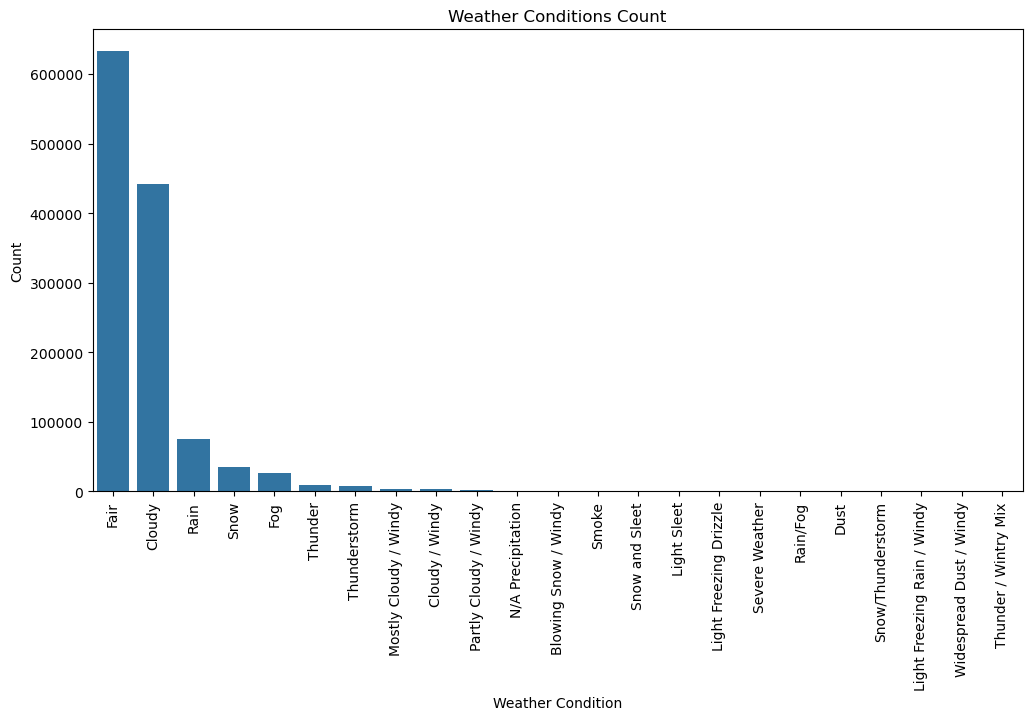

In [448]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Weather_Condition', data=df_2022, order=df_2022['Weather_Condition'].value_counts().index)
plt.title('Weather Conditions Count')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

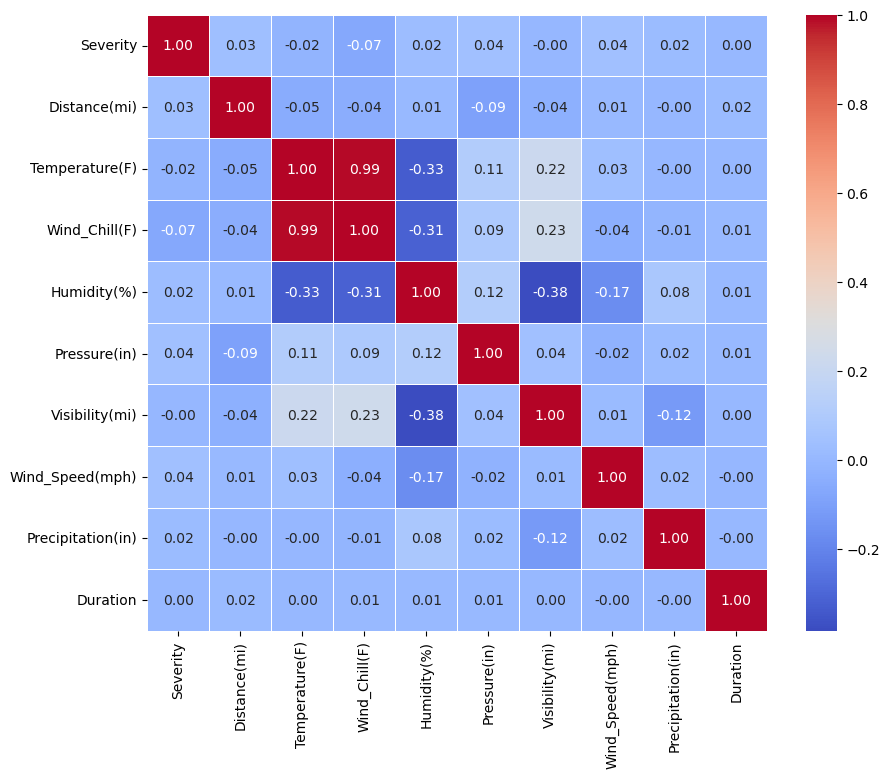

In [449]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a copy of the dataset
df_copy = df.copy()

# Drop unwanted columns
df_copy = df_copy.drop(columns=['Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Year', 'Hour', 'Day', 'Month'])

# Select numerical columns
numerical_cols = df_copy.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlation matrix
correlation_matrix = df_copy[numerical_cols].corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()


In [450]:
#Methods for SoftMax Regression

In [451]:
def get_batches(
    data_len: int, 
    batch_size: int = 32,
) -> List[np.ndarray]:
    """ Generates mini-batches based on the data indexes
        
        Args:
            data_len: Length of the data or number of data samples 
                in the data. This is used to generate the indices of
                the data.
            
            batch_size: Size of each mini-batch where the last mini-batch
                might be smaller than the rest if the batch_size does not 
                evenly divide the data length.

        Returns:
            A list of NumPy array's holding the indices of batches
    """
    indices = np.arange(data_len)
    np.random.shuffle(indices)
    batches = [indices[i:i+batch_size] for i in range(0, data_len, batch_size)]

    return batches

In [452]:
def nll_loss(y: np.ndarray, probs: np.ndarray) -> float:
    """ Computes the average generalized NLL Loss

        Args:
            y: The ground truth one-hot encoded labels
                given as matrix of shape (M, |K|).

            probs: The predicted probabilities for the
                corresponding labels given as a matrix
                of shape (M, |K|)
    """
    lo = y * np.log(probs)
    loss = -np.mean(np.sum(lo, axis=1)) 
    
    return loss

In [453]:
def softmax(z: np.ndarray) -> np.ndarray:
    """ Computes the stablized version of the softmax

        Args:
            z: A vector or matrix of continuous values.

        Return:
            A NumPy array with the same shape as the input.
    """
    z_max = np.max(z, keepdims=True, axis = -1)
    z_exp = np.exp(z-z_max)
    return z_exp / np.sum(z_exp, keepdims=True, axis = -1)

In [454]:
#Softmax Regression Implementation

In [455]:
class SoftmaxRegression():
    """ Performs softmax regression using gradient descent
    
        Attributes:
            alpha: learning rate or step size.
            batch_size: Size of mini-batches for mini-batch gradient descent.
            epochs: Number of epochs to run for mini-batch gradient descent.
            seed: Seed to be used for NumPy's RandomState class or np.random.seed() function.
            W: Matrix of weights with shape (N, |K|)
            trn_loss: Stores the training loss for each epoch.
            vld_loss: Stores the validation loss for each epoch.
    """
    
    def __init__(self, alpha: float, batch_size: int, epochs: int = 1, seed: int = 0):
        self.alpha = alpha
        self.batch_size = batch_size
        self.epochs = epochs
        self.seed = seed
        self.W = None
        self.trn_loss = None
        self.vld_loss = None
    
    def fit(self, X: np.ndarray, y: np.ndarray, X_vld: np.ndarray = None, y_vld: np.ndarray = None) -> object:
        """
            Args:
                X: Training features/data
                y: Training labels (one-hot encoded)
                X_vld: Validation features/data
                y_vld: Validation labels (one-hot encoded)
                seed: Seed used for initializing weights
        """
        np.random.seed(self.seed)  # Set seed for reproducibility
        self.trn_loss = []  # To track training loss for each epoch
        self.vld_loss = []  # To track validation loss for each epoch

        N, K = X.shape[1], y.shape[1]  
        self.W = np.random.rand(N,K)

        for epoch in range(self.epochs):
            batches = get_batches(X.shape[0], self.batch_size)  
            
            for batch_indices in batches:
                X_batch = X[batch_indices]
                y_batch = y[batch_indices]

                Z = X_batch @ self.W  # N x K
                Yhat_probs = softmax(Z)  # N x K

                gradient = X_batch.T @ (Yhat_probs - y_batch) / X_batch.shape[0]

                self.W -= self.alpha * gradient

            trn_loss_epoch = nll_loss(y, softmax(X @ self.W))
            self.trn_loss.append(trn_loss_epoch)

            if X_vld is not None and y_vld is not None:
                vld_loss_epoch = nll_loss(y_vld, softmax(X_vld @ self.W))
                self.vld_loss.append(vld_loss_epoch)

        return self
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        """
            Args:
                X: Testing data given as a 2D matrix
            Returns:
                A 2D column vector of predictions for each data sample in X
        """
        Z = X @ self.W  
        predictions = np.argmax(Z, axis=1)  
        return predictions.reshape(-1, 1)  


In [456]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

df = df_2022

features = ['Visibility(mi)','Precipitation(in)']
target = 'Severity'

df = df.dropna(subset=features + [target])

X = df[features]
y = df[target]

encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y.values.reshape(-1, 1))

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_trn, X_temp, y_trn, y_temp = train_test_split(X_scaled, y_onehot, train_size=0.8, random_state=42)
X_vld, X_tst, y_vld, y_tst = train_test_split(X_temp, y_temp, train_size=0.5, random_state=42)

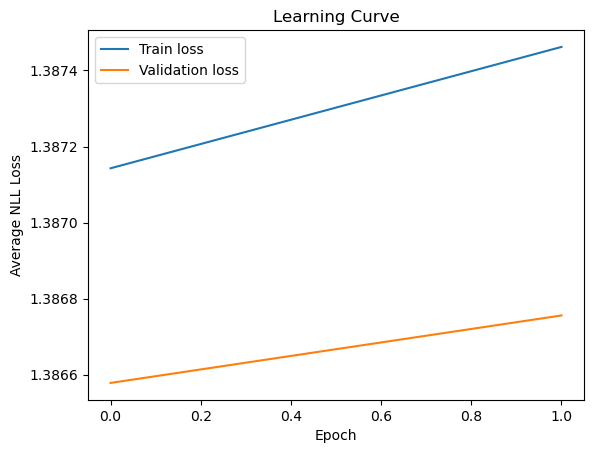

Test Accuracy: 83.68%


In [457]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

model = SoftmaxRegression(alpha=.1, batch_size=32, epochs=2, seed=42)
model.fit(X_trn, y_trn, X_vld, y_vld)

y_pred = model.predict(X_tst)
y_true = np.argmax(y_tst, axis=1) 

plt.plot(model.trn_loss, label='Train loss')
plt.plot(model.vld_loss, label='Validation loss')
plt.title("Learning Curve")
plt.ylabel("Average NLL Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

accuracy = np.mean(y_pred.flatten() == y_true)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

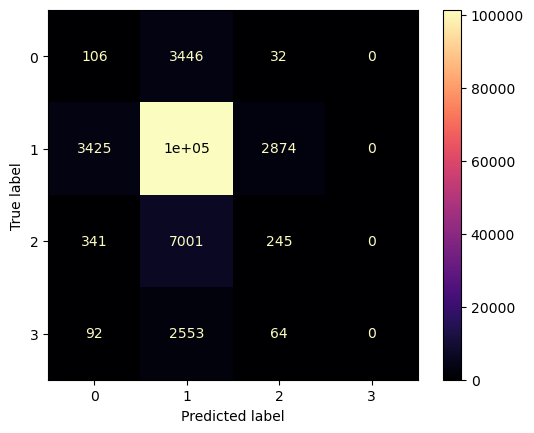

In [458]:
cm = confusion_matrix(y_true, y_pred.flatten())  
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(len(np.unique(y_true)))) 

disp.plot(cmap='magma')
plt.show()

Training Accuracy: 0.8853


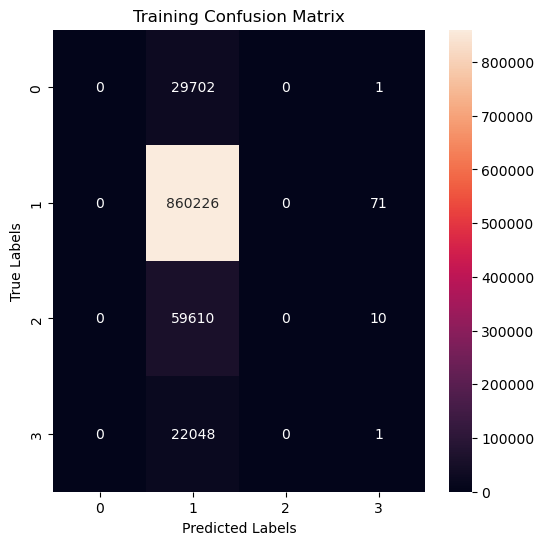

In [459]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

features = ['Visibility(mi)', 'Precipitation(in)']
target = 'Severity'

df = df_2022.dropna(subset=features + [target])
X = df[features]
y = df[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_trn, X_temp, y_trn, y_temp = train_test_split(X_scaled, y, train_size=0.8, random_state=42)
X_vld, X_tst, y_vld, y_tst = train_test_split(X_temp, y_temp, train_size=0.5, random_state=42)

gnb = GaussianNB()
gnb.fit(X_trn, y_trn)

y_trn_pred = gnb.predict(X_trn)
train_accuracy = accuracy_score(y_trn, y_trn_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

cm_trn = confusion_matrix(y_trn, y_trn_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_trn, annot=True, fmt="d")
plt.title("Training Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Validation Accuracy: 0.8857


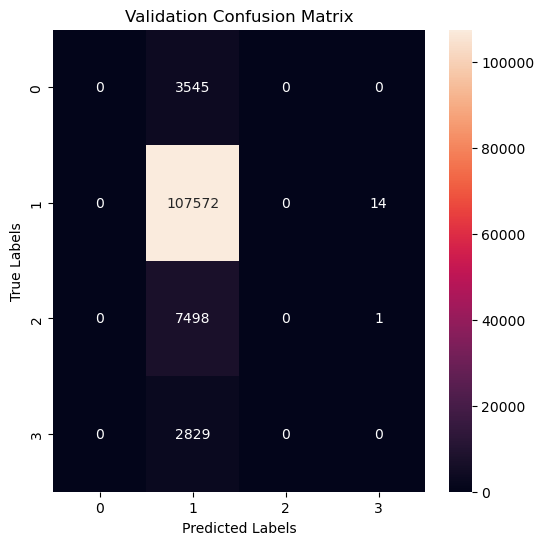

In [460]:
#Validation Matrix
y_vld_pred = gnb.predict(X_vld)
val_accuracy = accuracy_score(y_vld, y_vld_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")

cm_vld = confusion_matrix(y_vld, y_vld_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_vld, annot=True, fmt="d")
plt.title("Validation Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Testing Accuracy: 0.8857


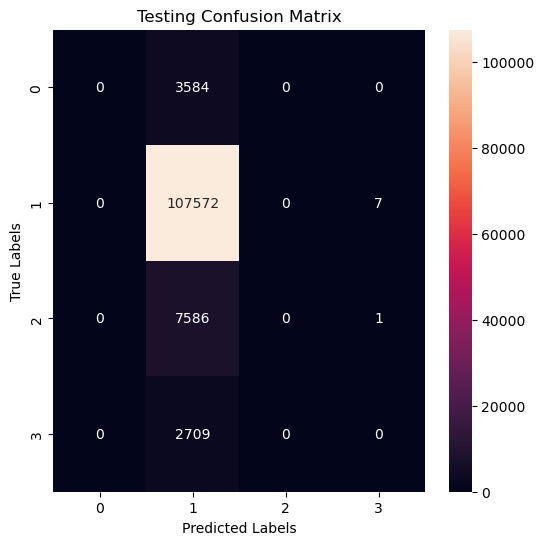

In [461]:
#Testing Matrix
y_tst_pred = gnb.predict(X_tst)
test_accuracy = accuracy_score(y_tst, y_tst_pred)
print(f"Testing Accuracy: {test_accuracy:.4f}")

cm_tst = confusion_matrix(y_tst, y_tst_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_tst, annot=True, fmt="d")
plt.title("Testing Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
###Chatgpt, chatgpt.com/. Accessed 9 December. 2024. 